<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/EXPLORATION/01/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-1. MNIST 이미지 분류

## 1-2. 데이터를 준비하자!

### MNIST 숫자 손글씨 Dataset 불러들이기

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # 텐서플로우 버전

2.5.0


In [3]:
mnist = keras.datasets.mnist # mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist data load

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(x_train))

60000


MNIST 데이터 셋은 Yann Lecun 교수가 공개한 데이터이다.
- [THE MNIST DATABASE
](http://yann.lecun.com/exdb/mnist/)
- 손글씨 이미지의 크기는 `28x28`이다.
- 총 70000 장의 이미지가 있는데 60000장의 training set과 10000장의 test set으로 구성되어 있다.
- traning set에는 대략 250명의 손글씨가 들어있다.

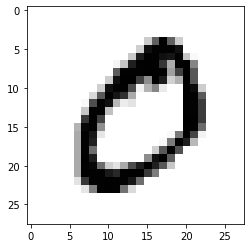

In [5]:
# 손글씨 이미지 출력
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

- `x_train`에는 실제 이미지가 담겨져 있다.

In [6]:
# y_train 확인
print(y_train[1]) 

0


- `y_train`에는 이미지의 정답(label)이 담겨져 있다.

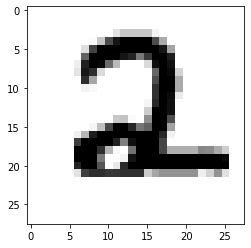

4778 번째 이미지의 숫자는 2 입니다


In [7]:
# 다른 이미지 확인
index = 4777

plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()

print(f'{index + 1} 번째 이미지의 숫자는 {y_train[index]} 입니다')

- [Matplotlib 활용사례](https://matplotlib.org/2.0.2/gallery.html)

### 학습용 데이터와 시험용 데이터

```python
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```
`mnist.load()` 함수를 통해 학습용 데이터와 시험용 데이터를 나누어서 받는다.

앞으로 만들 손글씨 분류기는 학습용 데이터(`x_train, y_train`)만을 가지고 학습한다. 학습이 끝난 후 이 분류기가 얼마나 좋은 성능을 보이는지 확인할 때 시험용 데이터(`x_test, y_test`)로 테스트 할 수 있다.

MNIST 데이터셋은 약 500명의 사용자가 작성한 이미지를 가지고 있는데, 그 중 250여명의 데이터가 학습용 데이터, 다른 250여명의 데이터가 시험용 데이터로 이용된다.

In [8]:
# 학습용 데이터 shape
print(x_train.shape)

(60000, 28, 28)


- 28x28 크기의 숫자 이미지가 60,000 장 있다

In [9]:
# 테스트용 데이터 shape
print(x_test.shape)

(10000, 28, 28)


[참고문헌 : 데이터셋 이야기](https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/)

**검증용 데이터(validation set) 사용**
- 머신러닝 학습 과정이 정상적으로 진행되고 있는지
- 오버피팅이 발생하고 있지 않은지
- 학습을 중단해도 되는지 확인하고 싶을 때


### 데이터 전처리 하기

In [10]:
# 손글씨 이미지의 픽셀값 확인
print("Min: ", np.min(x_train), "Max: ", np.max(x_train))

Min:  0 Max:  255


- 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가진다.
- 인공지능 모델을 훈련시키고자 할때, 일반적으로 입력은 0~1 사이의 값으로 정규화시켜주는 것이 좋다.
- MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나누어 주면 된다.

In [11]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

print("Min: ", np.min(x_train_norm), "Max: ", np.max(x_train_norm))

Min:  0.0 Max:  1.0


## 1-3. 딥러닝 네트워크 설계하기

### Sequential Model을 사용해 보자
**텐서플로우 케라스(tf.keras)**에서 **Sequential API**라는 방법을 사용할 것이다. 
**Sequential API**는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법이다. 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있다.

In [12]:
# Sequential API를 이용하여 LeNet 딥러닝 네트워크 설계
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


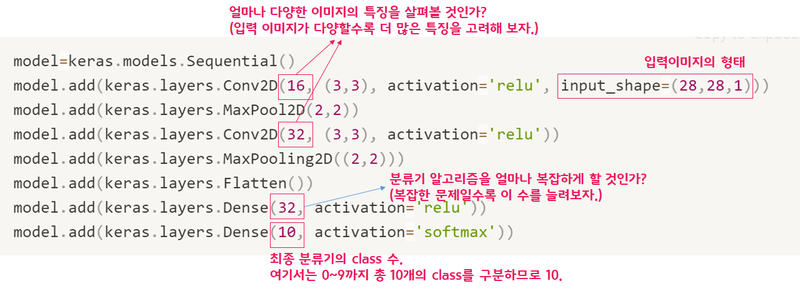

- `Cov2D` 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수이다.
    - 16과 32는 각각 16개, 32개의 이미지 특징을 고려하겠다는 뜻이다.
    - 여기서 사용하는 숫자 이미지는 매우 단순한 형태의 이미지인데 강아지 사진과 같은 이미지라면 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있다.
- `Dense` 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자이다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다.
- 마지막 `Dense` 레이어의 뉴런 숫자는 결과적으로 분류해야 하는 클래스 수로 지정하면 된다.

In [13]:
# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

- 딥러닝 네트워크 모델을 확인해보려면 `model.summary()` 메소드를 이용하면 된다.

## 1-4. 딥러닝 네트워크 학습시키기
- 이전에 만든 네트워크 입력은 `(데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)`와 같은 형태를 가진다.
    - `input_shape=(28, 28, 1)`
- `print(x_train.shape)`을 해보면 `(60000, 28, 28)`로 채널 수에 대한 정보가 없다. 따라서 `(60000, 28, 28, 1)`로 만들어줘야 한다.
    - 여기서 채널수 1은 흑백 이미지를 의미한다. 컬러 이미지라면 RGB 세 가지 값이 있기 때문에 3이 되어야 한다.

In [14]:
print(f"Before Reshape of x_train_norm: {x_train_norm.shape}")
print(f"Before Reshape of x_test_norm: {x_test_norm.shape}")

Before Reshape of x_train_norm: (60000, 28, 28)
Before Reshape of x_test_norm: (10000, 28, 28)


In [21]:
# 데이터 개수에 -1을 reshape시 자동계산된다.
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

In [22]:
print(f"After Reshape of x_train_norm: {x_train_reshaped.shape}")
print(f"After Reshape of x_test_norm: {x_test_reshaped.shape}")

After Reshape of x_train_norm: (60000, 28, 28, 1)
After Reshape of x_test_norm: (10000, 28, 28, 1)


In [17]:
# x_train 학습 데이터로 딥러닝 네트워크 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10) # epochs은 반복 횟수

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1985 - accuracy: 0.9389
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0642 - accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 35s 19m

- 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있다. 
- 9 epoch 정도 부터는 인식률 상승이 미미하다. 10 epoch 정도 학습을 시키면 충분하다.

## 1-5. 얼마나 잘 만들었는지 확인하기

### 테스트 데이터로 성능을 확인해 보자
위의 인식 정확도는 학습용 데이터(`x_train`)을 가지고 구한 것이다. 즉, 연습 문제를 잘 푸는 인공지능인 것이다. 

실제로도 성능이 좋은지 시험용 데이터(`x_test`)를 가지고 확인해본다.

In [23]:
# 시험용 데이터 x_test로 확인
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0320 - accuracy: 0.9903
test_loss: 0.03196903318166733
test_accuracy: 0.9902999997138977


- 정확도가 소폭 하락했다.
- MNIST 데이터셋 참고 문헌을 보면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다르다. 즉, 한번도 본 적이 없는 손글씨의 필체가 섞여 있을 가능성이 높아 인식률이 떨어지는 것이다.

### 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자

`model.evalute()` 대신 `model.predict()`를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 

우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다. 이 함수의 출력값 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 것이다.

In [25]:
predicted_result = model.predict(x_test_reshaped) # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1) # 확률의 최대값이 예측하는 숫자를 뜻한다

idx = 0
print(f"models.predict() 결과: {predicted_result[idx]}\n")
print(f"model이 추론한 가장 가능성이 높은 결과 : ", predicted_labels[idx])
print(f"실제 데이터의 라벨 : ", y_test[idx])

models.predict() 결과: [3.35585426e-08 1.08501784e-11 2.73473355e-09 1.27881652e-08
 9.38384370e-10 1.06726954e-11 4.89250966e-19 9.99999881e-01
 2.84274537e-09 1.11634066e-07]

model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


- 벡터의 각각 결과는 각 숫자의 확률을 의미한다. 7일 확률이 1.00에 근접하여 숫자가 7이라는 것을 아주 확신하고 있다는 뜻이 된다.

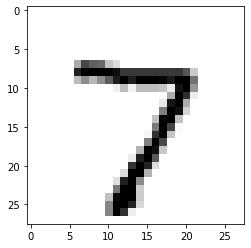

In [26]:
# 실제 이미지 출력
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포:  [4.3088781e-07 1.7295562e-06 4.0054265e-01 7.8108913e-04 2.0857096e-06
 1.2116216e-07 1.2673676e-10 5.9865487e-01 1.3574970e-05 3.4142752e-06]
라벨 : 2, 예측결과: 7


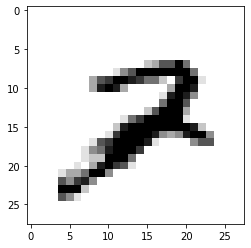

예측확률분포:  [2.4609352e-03 2.0736436e-05 2.7945813e-05 4.2062680e-07 1.3416869e-06
 8.1570363e-01 2.2900958e-02 1.5322580e-07 1.4744863e-01 1.1435329e-02]
라벨 : 6, 예측결과: 5


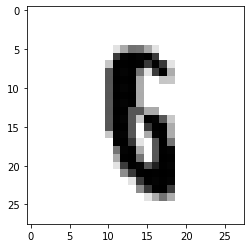

예측확률분포:  [8.55206430e-01 1.26090135e-05 1.09416945e-02 1.05068363e-01
 6.99664424e-11 2.63145044e-02 2.50440135e-09 9.80796244e-07
 2.08558887e-07 2.45516631e-03]
라벨 : 3, 예측결과: 0


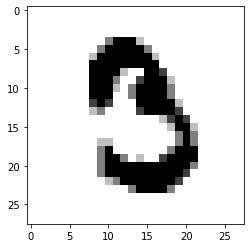

예측확률분포:  [7.5345795e-04 3.6685583e-07 4.8769679e-02 1.3476300e-01 5.3773022e-09
 4.0814487e-07 1.9549211e-09 3.8584803e-06 8.1570429e-01 4.9171590e-06]
라벨 : 3, 예측결과: 8


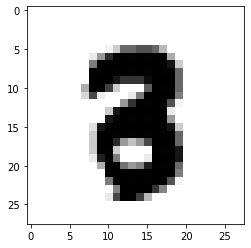

예측확률분포:  [2.8598010e-05 6.5655835e-02 3.0278879e-01 5.1047094e-04 3.5812311e-05
 2.6719853e-09 8.8220544e-13 6.3085210e-01 4.6972391e-06 1.2372162e-04]
라벨 : 2, 예측결과: 7


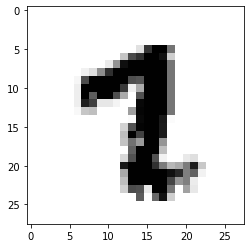

In [31]:
# model이 추론해 낸 숫자와 실제 라벨 값이 다른 경우 확인
import random

wrong_predict_list = []

for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아본다
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
    
# wrong_predict_list에서 랜덤하게 5개만 뽑아본다
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print(f"예측확률분포:  {str(predicted_result[n])}")
    print(f"라벨 : {str(y_test[n])}, 예측결과: {str(predicted_labels[n])}")
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 1-6. 더 좋은 네트워크 만들어 보기
더 좋은 딥러닝 네트워크를 설계하기 위해 하이퍼파라미터들을 바꾸어 볼 수 있다.

- `Conv2D` 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여보기
- `Dense` 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여보기
- `Dense` 레이어에서 뉴런수를 바꾸어 보기
- `epoch` 값을 변경해보기


In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))